> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (TMDb_Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I'm going to investigate the (TMDb_Movies Dataset) which I dowloaded from Kaggle web  page. 
>
> The dataset has information about 10,000 movies and consist of 21 columns such as popularity, budget, 	revenue,	original_title, cast ...etc.
>
>I'm lookingforward to figure out which genres are most popular from year to year? and what kinds of properties are associated with movies that have high revenues?

In [357]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [358]:
# Load tmdb-movies.csv dataset file
# Change release date column into date format.
tmdb = pd.read_csv('tmdb-movies.csv' , \
        parse_dates = ['release_date'])
tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,125336,tt2044056,0.006925,-,-,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,2011-09-03,14,9.2,2011,0.0,0.0
1,150004,tt0289830,0.469332,-,-,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,NaN,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,Some secrets we keep. Some are kept from us,...,"Taken spans five decades and four generations,...",877,Science Fiction,DreamWorks,2002-12-02,38,6.8,2002,0.0,0.0
2,331214,tt0185906,0.537593,-,"125,000,000",Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,http://www.hbo.com/band-of-brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,Ordinary men. Extraordinary times.,...,Drawn from interviews with survivors of Easy C...,705,Action|Drama|War,HBO,2001-09-09,313,8.0,2001,0.0,153936014.6


In [359]:
# Count number of rows and columns
tmdb.shape

(10866, 21)

In [360]:
tmdb.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [361]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10866 non-null  int64         
 1   imdb_id               10856 non-null  object        
 2   popularity            10866 non-null  float64       
 3    budget               10866 non-null  object        
 4    revenue              10866 non-null  object        
 5   original_title        10866 non-null  object        
 6   cast                  10790 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10822 non-null  object        
 9   tagline               8042 non-null   object        
 10  keywords              9373 non-null   object        
 11  overview              10862 non-null  object        
 12  runtime               10866 non-null  int64         
 13  genres          

In [362]:
# Check duplicate data
duplicats = tmdb[tmdb.duplicated(keep='last')]
duplicats


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9025,42194,tt0411951,0.59643,"30,000,000","967,000",TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [363]:
# Count all zero value in each colunms
(tmdb == 0).sum()

id                         0
imdb_id                    0
popularity                 0
 budget                    0
 revenue                   0
original_title             0
cast                       0
homepage                   0
director                   0
tagline                    0
keywords                   0
overview                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

In [364]:
# Count all null value in each colunms
tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
 budget                    0
 revenue                   0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Delete unnecessary information)


>**From the data wrangling results I confiermed that there are a unesessary columns and duplicated data and there are some rows withe null data and others with zero budget, zero revenue and zero runtime, so these data need to be cleaned by doing the following steps:**
>1. Delet unesessary columns which are (id, imdb_id, homepage, keywords, overview, production_companies, vote_count)
>2. Delet duplicated rows.
>3. Delet all rows which have zero value.
>4. Replace zero with NAN value.



In [365]:
# Delete unesessary columns

del_columns=[ 'id','imdb_id', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count']
tmdb_clean_columns= tmdb.drop(del_columns,1) 

tmdb_clean_columns.head()

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,0.006925,-,-,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,NaN,900,Documentary,2011-09-03,9.2,2011,0.0,0.0
1,0.469332,-,-,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,Some secrets we keep. Some are kept from us,877,Science Fiction,2002-12-02,6.8,2002,0.0,0.0
2,0.537593,-,"125,000,000",Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,Ordinary men. Extraordinary times.,705,Action|Drama|War,2001-09-09,8.0,2001,0.0,153936014.6
3,0.147489,-,-,Shoah,Simon Srebnik|Michael Podchlebnik|Motke Zaidl,Claude Lanzmann,NaN,566,Documentary,1985-11-01,8.3,1985,0.0,0.0
4,0.000065,-,-,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,NaN,561,Drama|History|Western,1985-11-03,6.0,1985,0.0,0.0


In [366]:
tmdb.shape

(10866, 21)

In [367]:
tmdb_clean_columns.shape

(10866, 14)

In [368]:
# Delete duplicate rows
tmdb_clean_columns.drop_duplicates(keep='last', inplace=True)
tmdb_clean_columns.shape

(10865, 14)

In [369]:
tmdb_clean_columns.dtypes

popularity               float64
 budget                   object
 revenue                  object
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [370]:
(tmdb_clean_columns == 0).sum()

popularity           0
 budget              0
 revenue             0
original_title       0
cast                 0
director             0
tagline              0
runtime             31
genres               0
release_date         0
vote_average         0
release_year         0
budget_adj        5696
revenue_adj       6016
dtype: int64

In [371]:
tmdb_clean_columns.isnull().sum()

popularity           0
 budget              0
 revenue             0
original_title       0
cast                76
director            44
tagline           2824
runtime              0
genres              23
release_date         0
vote_average         0
release_year         0
budget_adj           0
revenue_adj          0
dtype: int64

In [372]:
# Delete all rows with zero values.

budget_revenue_runtime = [' budget ', ' revenue ', 'budget_adj', 'revenue_adj', 'runtime'  ]

# This will replace all zero values from '0' to NAN.
tmdb_clean_columns[budget_revenue_runtime]= tmdb_clean_columns[budget_revenue_runtime].replace(0, np.NAN)


# Removing all row which has NaN value in budget_revenue
tmdb_clean_columns.dropna(subset = budget_revenue_runtime, inplace = True)

tmdb_clean_columns.shape

(3854, 14)

In [373]:
(tmdb_clean_columns == 0).sum()

popularity        0
 budget           0
 revenue          0
original_title    0
cast              0
director          0
tagline           0
runtime           0
genres            0
release_date      0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [374]:
tmdb_clean_columns=tmdb_clean_columns.fillna(" ")

In [375]:
tmdb_clean_columns.isnull().sum()

popularity        0
 budget           0
 revenue          0
original_title    0
cast              0
director          0
tagline           0
runtime           0
genres            0
release_date      0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [376]:
tmdb_clean_columns

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
20,9.432768,"237,000,000","2,781,505,847",Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162.0,Action|Adventure|Fantasy|Science Fiction,2009-12-10,7.1,2009,2.408869e+08,2.827124e+09
37,11.173104,"200,000,000","2,068,178,225",Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09
59,4.355219,"200,000,000","1,845,034,188",Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,194.0,Drama|Romance|Thriller,1997-11-18,7.3,1997,2.716921e+08,2.506406e+09
60,7.637767,"220,000,000","1,519,557,910",The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Some assembly required.,143.0,Science Fiction|Action|Adventure,2012-04-25,7.3,2012,2.089437e+08,1.443191e+09
61,32.985763,"150,000,000","1,513,528,810",Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10506,0.578849,"15,000,000",5,Bordello of Blood,Dennis Miller|Erika Eleniak|Angie Everhart|Joh...,Gilbert Adler,,87.0,Horror|Comedy,1996-08-16,4.9,1996,2.085325e+07,6.951084e+00
10511,0.208637,10,5,Kid's Story,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...,Shinichiro Watanabe,,15.0,Science Fiction|Animation,2003-06-02,6.8,2003,1.185353e+01,5.926763e+00
10607,0.352054,"200,000",3,Dr. Horrible's Sing-Along Blog,Neil Patrick Harris|Nathan Fillion|Felicia Day...,Joss Whedon,He has a Ph.D. in horribleness!,42.0,Adventure|Action|Comedy|Science Fiction|Music,2008-07-15,7.7,2008,2.025573e+05,3.038360e+00
10642,0.462609,"6,000,000",2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,,94.0,Drama|History,2003-11-14,6.4,2003,7.112116e+06,2.370705e+00


<a id='eda'></a>
## Exploratory Data Analysis

> ## **Questions that can analyised from this data set:**
> 1. Find the top 10 Highest Runtime Movies?
> 2. Find the top 10 Highest Revenues Movies?
> 3. Find the top 10 Highest Budgets Movies?
> 4. Find the top 10 Highest Rating Movies?
> 5. Find the top 10 Highest Net Profits Movies?





In [377]:
# Change the dtype fo the fields budget and revenue from object to float64

tmdb_clean_columns[[' budget ', ' revenue ']] = tmdb_clean_columns[[' budget ', ' revenue ']].apply(pd.to_numeric, errors='coerce')

In [378]:
tmdb_clean_columns.dtypes

popularity               float64
 budget                  float64
 revenue                 float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_average             float64
release_year               int64
budget_adj               float64
revenue_adj              float64
dtype: object

In [379]:
# Add new column for the Net Profit of the each movie

tmdb_clean_columns.insert(2,'net_profit',tmdb_clean_columns['revenue_adj'] - tmdb_clean_columns['budget_adj'])
   

In [380]:
tmdb_clean_columns.head()

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
20,9.432768,NaN,2.586237e+09,NaN,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162.0,Action|Adventure|Fantasy|Science Fiction,2009-12-10,7.1,2009,240886902.9,2.827124e+09
37,11.173104,NaN,1.718723e+09,NaN,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,183999919.0,1.902723e+09
59,4.355219,NaN,2.234714e+09,NaN,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,194.0,Drama|Romance|Thriller,1997-11-18,7.3,1997,271692064.2,2.506406e+09
60,7.637767,NaN,1.234248e+09,NaN,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Some assembly required.,143.0,Science Fiction|Action|Adventure,2012-04-25,7.3,2012,208943741.9,1.443191e+09
61,32.985763,NaN,1.254446e+09,NaN,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,137999939.3,1.392446e+09


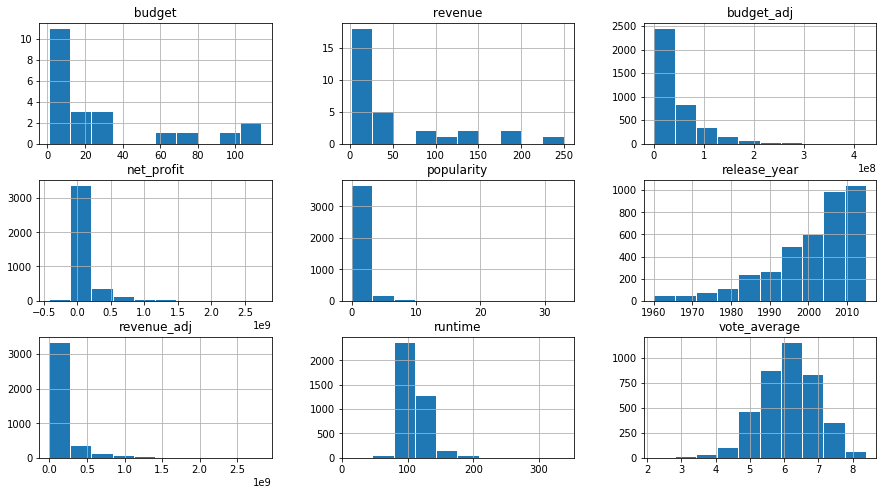

In [381]:
#tmdb_clean_columns.hist(figsize=(15,8));
tmdb_clean_columns.hist (bins = 10, rwidth = 0.95 , figsize=(15,8));


## Research Question 01 - Top 10 Highest Runtime Movies

In [382]:
by_runtime = tmdb_clean_columns.sort_values(['release_year','runtime'], ascending=[True, False])


In [383]:
by_runtime.shape

(3854, 15)

In [384]:
top_by_runtime = by_runtime.groupby('release_year').head().reset_index(drop=True)

In [385]:
top_by_runtime.shape

(279, 15)

In [386]:
top_by_runtime.head()

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,1.136943,NaN,3.539024e+08,NaN,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,More titanic than any story ever told!,197.0,Action|Drama|History,1960-10-06,6.9,1960,8.847561e+07,4.423780e+08
1,1.872132,NaN,2.141847e+07,NaN,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,They were seven - And they fought like seven h...,128.0,Action|Adventure|Western,1960-10-23,7.0,1960,1.474593e+07,3.616441e+07
2,0.947307,NaN,1.622053e+08,NaN,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,"Movie-wise, there has never been anything like...",125.0,Comedy|Drama|Romance,1960-06-15,7.9,1960,2.211890e+07,1.843242e+08
3,2.610362,NaN,2.299854e+08,NaN,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,The master of suspense moves his cameras into ...,109.0,Drama|Horror|Thriller,1960-08-14,8.0,1960,5.949601e+06,2.359350e+08
4,0.055821,NaN,3.022917e+07,NaN,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,,91.0,Comedy|Romance,1960-12-18,7.2,1960,2.211890e+07,5.234807e+07


In [387]:
runtime_release_year = pd.pivot_table(top_by_runtime, index = 'release_year', values = 'runtime' )

In [388]:
runtime_release_year.shape

(56, 1)

In [389]:
runtime_release_year.head()

,runtime
release_year,
1960,130.0
1961,161.0
1962,154.6
1963,161.6
1964,134.8


In [390]:
runtime_release_year.describe()

,runtime
count,56.000000
mean,151.019643
std,14.353681
min,127.000000
25%,136.550000
50%,151.400000
75%,161.050000
max,183.600000


In [391]:
# Plotting Function

def plotting(DATA, KIND , X_LABEL, Y_LABEL, TITLE): 
    
    DATA.plot(kind = KIND, figsize =(15, 7))
    plt.xlabel(X_LABEL , size =(20))
    plt.ylabel(Y_LABEL , size =(20))
    plt.title(TITLE , size =(25))
    plt.legend ()
    
       

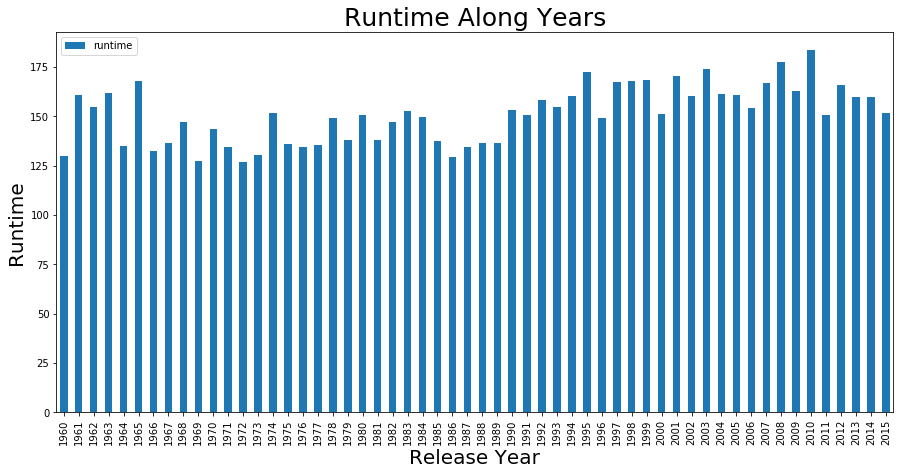

In [392]:
plotting(runtime_release_year, 'bar', 'Release Year', 'Runtime', 'Runtime Along Years')


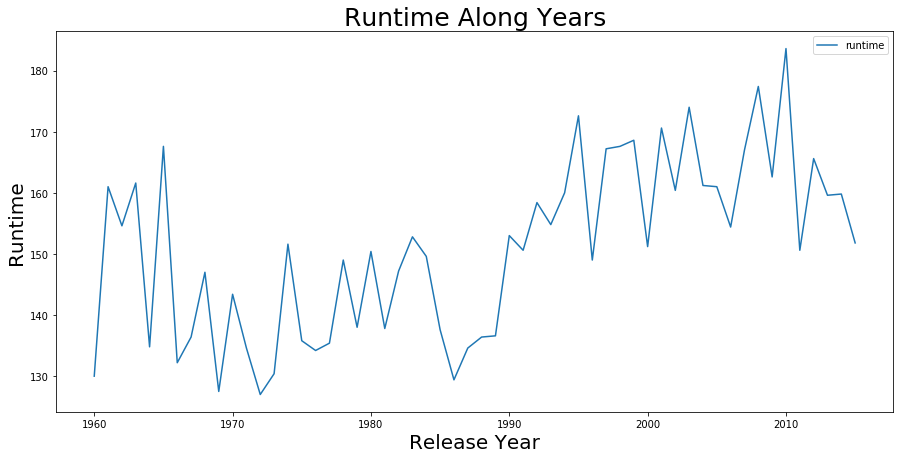

In [393]:
plotting(runtime_release_year, 'line', 'Release Year', 'Runtime', 'Runtime Along Years')


###### NOTE:  From the ghraph we can figure out that watching movies were popular between the year of 1960 to the eyear of 195, and then there was a reluctance of watching movies strating from 1967 up to 1987 and then started to populate again and kept growing positively.

In [394]:
top_10_runtime = top_by_runtime.nlargest(10, 'runtime')
top_10_runtime 

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
249,0.534192,NaN,-1.712872e+07,NaN,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,The man who hijacked the world,338.0,Crime|Drama|Thriller|History,2010-05-19,6.2,2010,1.800000e+07,8.712790e+05
15,0.804533,NaN,1.896460e+08,NaN,Cleopatra,Elizabeth Taylor|Richard Burton|Rex Harrison|R...,Joseph L. Mankiewicz|Rouben Mamoulian|Darryl F...,The motion picture the world has been waiting ...,248.0,Drama|History|Romance,1963-06-12,6.3,1963,2.215444e+08,4.111904e+08
99,0.418950,NaN,-1.072059e+08,NaN,Heaven's Gate,Kris Kristofferson|Christopher Walken|John Hur...,Michael Cimino,The only thing greater than their passion for ...,219.0,Action|Drama|History|Western,1980-11-19,6.0,1980,1.164256e+08,9.219668e+06
10,1.168767,NaN,3.964647e+08,NaN,Lawrence of Arabia,Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...,David Lean,A Mighty Motion Picture Of Action And Adventure!,216.0,Adventure|Drama|History|War,1962-12-10,7.5,1962,1.081267e+08,5.045914e+08
214,0.469518,NaN,-5.106033e+07,NaN,Gods and Generals,Stephen Lang|Jeff Daniels|Robert Duvall|Kevin ...,Ronald F. Maxwell,The nations heart was touched by...,214.0,Drama|History|War,2003-02-21,5.8,2003,6.637975e+07,1.531942e+07
239,0.389554,NaN,4.682315e+06,NaN,Jodhaa Akbar,Hrithik Roshan|Aishwarya Rai Bachchan|Sonu Soo...,Ashutosh Gowariker,,213.0,Action|Adventure|Drama|Foreign|History,2008-02-15,7.8,2008,8.483911e+06,1.316623e+07
159,0.648937,NaN,2.202038e+07,NaN,Malcolm X,Denzel Washington|Angela Bassett|Albert Hall|A...,Spike Lee,,202.0,Drama|History,1992-11-18,7.0,1992,5.283682e+07,7.485721e+07
215,7.122455,NaN,1.214855e+09,NaN,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,The eye of the enemy is moving.,201.0,Adventure|Fantasy|Action,2003-12-01,7.9,2003,1.114231e+08,1.326278e+09
69,3.264571,NaN,1.527582e+08,NaN,The Godfather: Part II,Al Pacino|Robert Duvall|Diane Keaton|Robert De...,Francis Ford Coppola,"I don't feel I have to wipe everybody out, Tom...",200.0,Drama|Crime,1974-12-20,8.1,1974,5.748969e+07,2.102479e+08
25,0.146033,NaN,-5.536451e+07,NaN,The Greatest Story Ever Told,Max von Sydow|Michael Anderson Jr.|Carroll Bak...,George Stevens,,199.0,Drama|History,1965-02-15,5.7,1965,1.384113e+08,8.304676e+07


In [395]:
# Top 10 Movies by Runtime

top_10_runtime = pd.pivot_table(top_10_runtime, index = 'original_title', values = 'runtime')

In [396]:
top_10_runtime.shape

(10, 1)

In [397]:
top_10_runtime.head()

,runtime
original_title,
Carlos,338.0
Cleopatra,248.0
Gods and Generals,214.0
Heaven's Gate,219.0
Jodhaa Akbar,213.0


In [398]:
top_10_runtime

,runtime
original_title,
Carlos,338.0
Cleopatra,248.0
Gods and Generals,214.0
Heaven's Gate,219.0
Jodhaa Akbar,213.0
Lawrence of Arabia,216.0
Malcolm X,202.0
The Godfather: Part II,200.0
The Greatest Story Ever Told,199.0


In [399]:
top_10_runtime = top_10_runtime.runtime.sort_values( ascending=False)

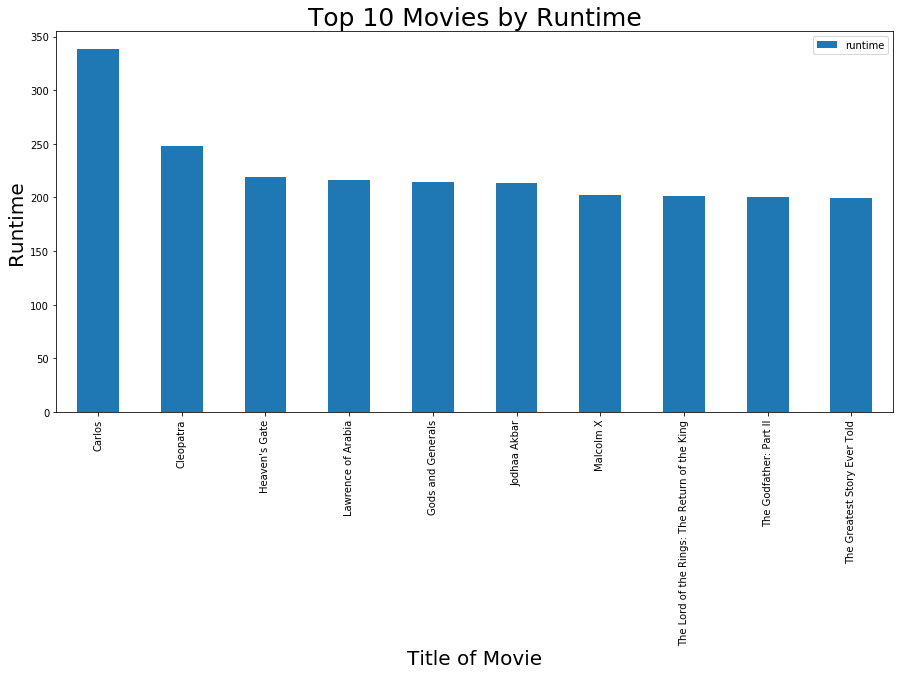

In [400]:
plotting(top_10_runtime, 'bar', 'Title of Movie', 'Runtime', 'Top 10 Movies by Runtime')

##### Note:  From the ghraph we can figur out that the highest runtime movie is Carlos.

In [401]:
runtime_by_vote_average = pd.pivot_table(by_runtime, index = 'release_year', values = ['runtime', 'vote_average'])

In [402]:
# Plotting 2d Function

def plotting2d (DATA, KIND, X_LABEL, Y_LABEL, TITLE):
    
    DATA.plot( x = X_LABEL , y = Y_LABEL , kind = KIND, figsize =(16 , 7), label = [X_LABEL , Y_LABEL] )
    plt.xlabel ( X_LABEL , size =(20) )
    plt.ylabel ( Y_LABEL , size =(20) )
    plt.title ( TITLE , size =(25) )
    plt.legend()

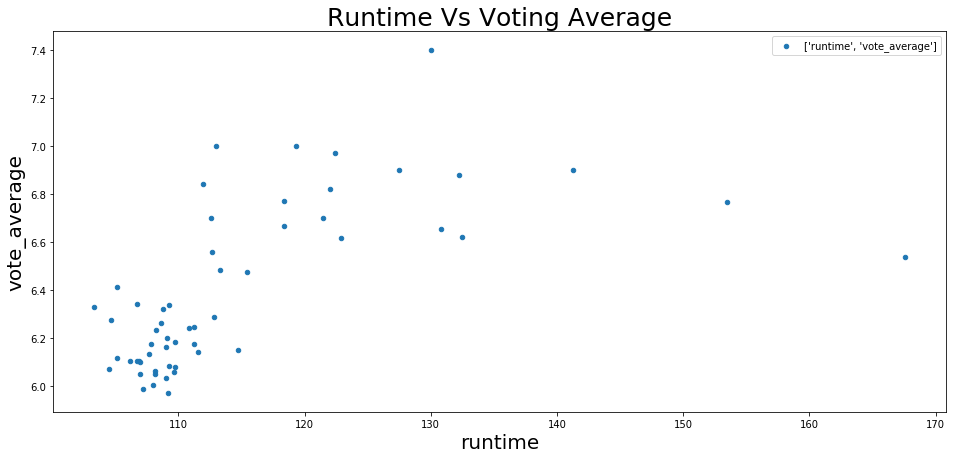

In [403]:
plotting2d (runtime_by_vote_average, 'scatter' , 'runtime' , 'vote_average' , 'Runtime Vs Voting Average' )

##### NOTE: From the ghraph we can figure out that there is a moderate postive non-liner correlation, and there is anout lier valye.

## Research Question 02 - Top 10 Highest Revenue Movies

In [404]:
by_revenue = tmdb_clean_columns.sort_values(['release_year','revenue_adj'], ascending=[True, False])

In [405]:
by_revenue.shape

(3854, 15)

In [406]:
by_revenue.describe()

,popularity,budget,net_profit,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,22.000000,3.854000e+03,31.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,30.090909,9.282470e+07,51.516129,109.220291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,36.818615,1.940715e+08,67.591356,19.922820,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000,-4.139124e+08,2.000000,15.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,6.500000,-1.504995e+06,11.000000,95.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,13.000000,2.737064e+07,16.000000,106.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,28.750000,1.074548e+08,62.000000,119.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,114.000000,2.750137e+09,250.000000,338.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [407]:
top_by_revenue = by_revenue.groupby('release_year').head().reset_index(drop=True)

In [408]:
top_by_revenue.shape

(279, 15)

In [409]:
top_by_revenue.head()

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,1.136943,NaN,3.539024e+08,NaN,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,More titanic than any story ever told!,197.0,Action|Drama|History,1960-10-06,6.9,1960,8.847561e+07,4.423780e+08
1,2.610362,NaN,2.299854e+08,NaN,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,The master of suspense moves his cameras into ...,109.0,Drama|Horror|Thriller,1960-08-14,8.0,1960,5.949601e+06,2.359350e+08
2,0.947307,NaN,1.622053e+08,NaN,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,"Movie-wise, there has never been anything like...",125.0,Comedy|Drama|Romance,1960-06-15,7.9,1960,2.211890e+07,1.843242e+08
3,0.055821,NaN,3.022917e+07,NaN,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,,91.0,Comedy|Romance,1960-12-18,7.2,1960,2.211890e+07,5.234807e+07
4,1.872132,NaN,2.141847e+07,NaN,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,They were seven - And they fought like seven h...,128.0,Action|Adventure|Western,1960-10-23,7.0,1960,1.474593e+07,3.616441e+07


In [410]:
revenue_release_year = pd.pivot_table(top_by_revenue, index = 'release_year', values = 'revenue_adj')

In [411]:
runtime_release_year.shape

(56, 1)

In [412]:
revenue_release_year.head()

,revenue_adj
release_year,
1960,1.902299e+08
1961,4.565419e+08
1962,2.893902e+08
1963,2.442604e+08
1964,4.507990e+08


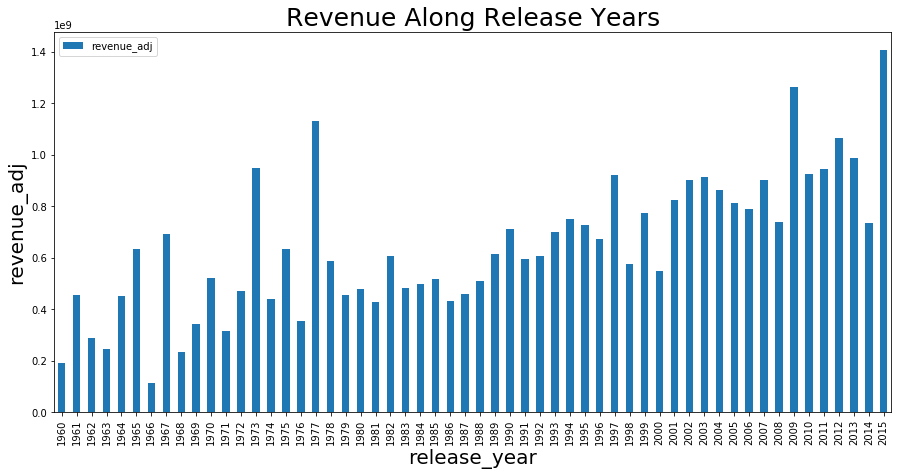

In [413]:
plotting (revenue_release_year, 'bar', 'release_year', 'revenue_adj', 'Revenue Along Release Years')

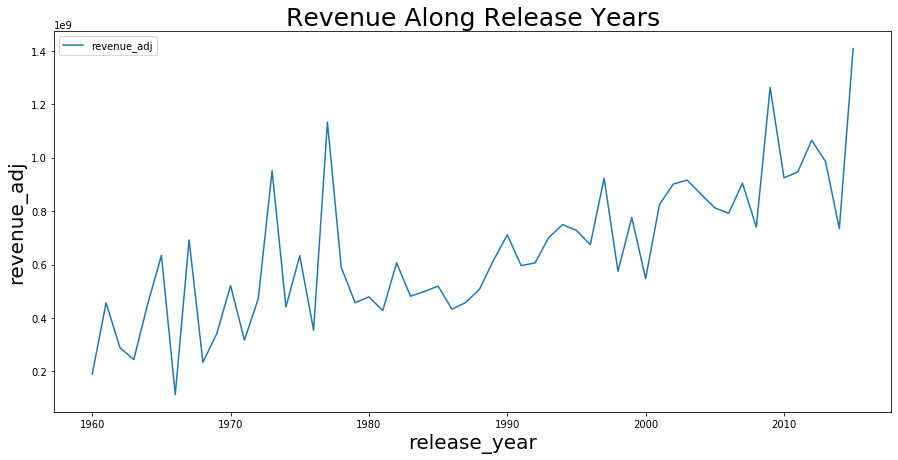

In [414]:
plotting (revenue_release_year, 'line', 'release_year', 'revenue_adj', 'Revenue Along Release Years')

##### NOTE: From the graph we can figure out that there is a moderate linear positive association between revenue and release years as the revenue kept growth.

In [415]:
# Top 10 Movies by Revenue

top_10_revenue = top_by_revenue.nlargest(10, 'revenue_adj')
top_10_revenue 

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
244,9.432768,NaN,2.586237e+09,NaN,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162.0,Action|Adventure|Fantasy|Science Fiction,2009-12-10,7.1,2009,2.408869e+08,2.827124e+09
84,12.037933,NaN,2.750137e+09,NaN,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,"A long time ago in a galaxy far, far away...",121.0,Adventure|Action|Science Fiction,1977-03-20,7.9,1977,3.957559e+07,2.789712e+09
184,4.355219,NaN,2.234714e+09,NaN,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,194.0,Drama|Romance|Thriller,1997-11-18,7.3,1997,2.716921e+08,2.506406e+09
64,2.010733,NaN,2.128036e+09,NaN,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Something almost beyond comprehension is happe...,122.0,Drama|Horror|Thriller,1973-12-26,7.2,1973,3.928928e+07,2.167325e+09
74,2.563191,NaN,1.878643e+09,NaN,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,Don't go in the water.,124.0,Horror|Thriller|Adventure,1975-06-18,7.3,1975,2.836275e+07,1.907006e+09
274,11.173104,NaN,1.718723e+09,NaN,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09
109,2.900556,NaN,1.767968e+09,NaN,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,He is afraid. He is alone. He is three million...,115.0,Science Fiction|Adventure|Family|Fantasy,1982-04-03,7.2,1982,2.372625e+07,1.791694e+09
174,1.136610,NaN,1.551568e+09,NaN,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,114.0,Crime|Drama|Mystery|Thriller|Action,1995-07-28,5.6,1995,3.148127e+07,1.583050e+09
5,2.631987,NaN,1.545635e+09,NaN,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,79.0,Adventure|Animation|Comedy|Family,1961-01-25,6.6,1961,2.917944e+07,1.574815e+09
259,7.637767,NaN,1.234248e+09,NaN,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Some assembly required.,143.0,Science Fiction|Action|Adventure,2012-04-25,7.3,2012,2.089437e+08,1.443191e+09


In [416]:
top_10_revenue = pd.pivot_table(top_10_revenue, index = 'original_title', values = 'revenue_adj')

In [417]:
top_10_revenue.shape

(10, 1)

In [418]:
top_10_revenue.head()

,revenue_adj
original_title,
Avatar,2.827124e+09
E.T. the Extra-Terrestrial,1.791694e+09
Jaws,1.907006e+09
One Hundred and One Dalmatians,1.574815e+09
Star Wars,2.789712e+09


In [419]:
top_10_revenue = top_10_revenue.revenue_adj.sort_values(ascending = False)

In [420]:
top_10_revenue

original_title
Avatar                            2.827124e+09
Star Wars                         2.789712e+09
Titanic                           2.506406e+09
The Exorcist                      2.167325e+09
Jaws                              1.907006e+09
Star Wars: The Force Awakens      1.902723e+09
E.T. the Extra-Terrestrial        1.791694e+09
The Net                           1.583050e+09
One Hundred and One Dalmatians    1.574815e+09
The Avengers                      1.443191e+09
Name: revenue_adj, dtype: float64

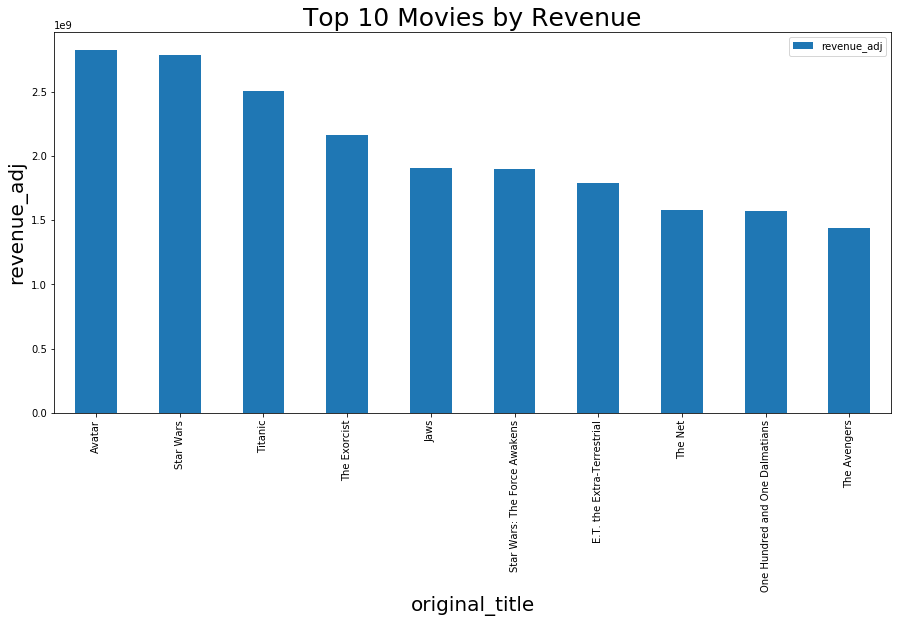

In [421]:
plotting (top_10_revenue, 'bar', 'original_title', 'revenue_adj', 'Top 10 Movies by Revenue')

##### NOTE:  From the grapgh we can figure out that the top revenue movie ws Avatar.  





## Research Question 03 - Top 10 Highest Budget Movies

In [422]:
by_budget = tmdb_clean_columns.sort_values(['release_year','budget_adj'], ascending=[True, False])

In [423]:
by_budget.shape

(3854, 15)

In [424]:
by_budget.describe()

,popularity,budget,net_profit,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,22.000000,3.854000e+03,31.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,30.090909,9.282470e+07,51.516129,109.220291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,36.818615,1.940715e+08,67.591356,19.922820,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000,-4.139124e+08,2.000000,15.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,6.500000,-1.504995e+06,11.000000,95.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,13.000000,2.737064e+07,16.000000,106.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,28.750000,1.074548e+08,62.000000,119.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,114.000000,2.750137e+09,250.000000,338.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [425]:
top_by_budget  = by_budget.groupby('release_year').head().reset_index(drop=True)

In [426]:
top_by_budget.shape

(279, 15)

In [427]:
top_by_budget.head()

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,1.136943,NaN,3.539024e+08,NaN,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,More titanic than any story ever told!,197.0,Action|Drama|History,1960-10-06,6.9,1960,8.847561e+07,4.423780e+08
1,0.947307,NaN,1.622053e+08,NaN,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,"Movie-wise, there has never been anything like...",125.0,Comedy|Drama|Romance,1960-06-15,7.9,1960,2.211890e+07,1.843242e+08
2,0.055821,NaN,3.022917e+07,NaN,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,,91.0,Comedy|Romance,1960-12-18,7.2,1960,2.211890e+07,5.234807e+07
3,1.872132,NaN,2.141847e+07,NaN,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,They were seven - And they fought like seven h...,128.0,Action|Adventure|Western,1960-10-23,7.0,1960,1.474593e+07,3.616441e+07
4,2.610362,NaN,2.299854e+08,NaN,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,The master of suspense moves his cameras into ...,109.0,Drama|Horror|Thriller,1960-08-14,8.0,1960,5.949601e+06,2.359350e+08


In [428]:
budget_release_year = pd.pivot_table(top_by_budget, index = 'release_year', values = 'budget_adj')

In [429]:
budget_release_year.shape

(56, 1)

In [430]:
budget_release_year.head()

,budget_adj
release_year,
1960,3.068179e+07
1961,3.944623e+07
1962,5.456796e+07
1963,8.346986e+07
1964,4.448073e+07


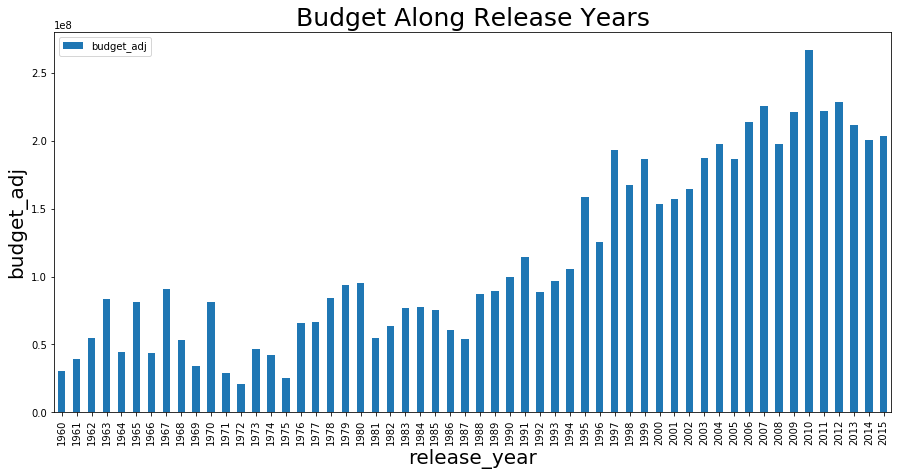

In [431]:
plotting (budget_release_year, 'bar', 'release_year', 'budget_adj', 'Budget Along Release Years')

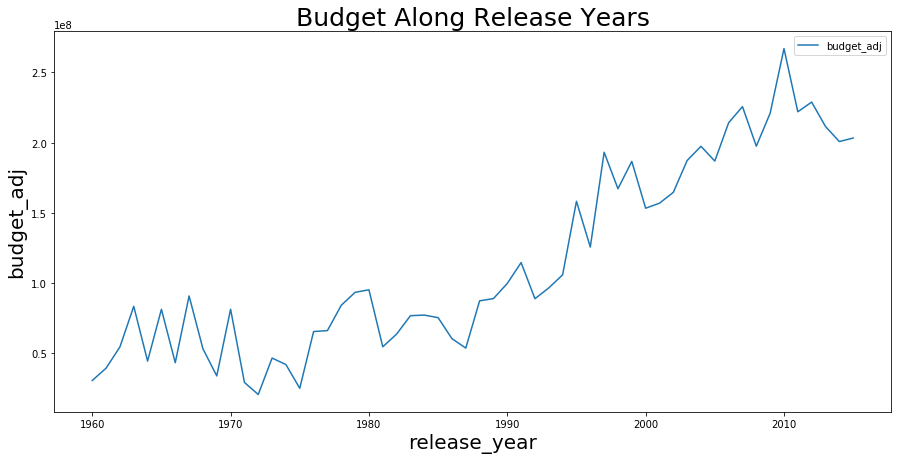

In [432]:
plotting (budget_release_year, 'line', 'release_year', 'budget_adj', 'Budget Along Release Years')

##### NOTE: From the graph we can figure out that budgeting of movies were increasing by the years and the highest budgeting were in the recent years after the year 2000.

In [433]:
# Top 10 Movies by Budget

top_10_budget = top_by_budget.nlargest(10, 'budget_adj')
top_10_budget 

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
249,0.250540,NaN,-4.139124e+08,NaN,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Assassin. Hero. Legend.,100.0,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,6.4,2010,425000000.0,1.108757e+07
254,4.955130,NaN,6.220462e+08,NaN,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,Live Forever Or Die Trying.,136.0,Adventure|Action|Fantasy,2011-05-11,6.3,2011,368371256.2,9.904175e+08
234,4.965391,NaN,6.951529e+08,NaN,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,"At the end of the world, the adventure begins.",169.0,Adventure|Fantasy|Action,2007-05-19,6.8,2007,315500574.8,1.010654e+09
229,1.957331,NaN,1.309698e+08,NaN,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,,154.0,Adventure|Fantasy|Action|Science Fiction,2006-06-28,5.3,2006,292050672.7,4.230205e+08
184,4.355219,NaN,2.234714e+09,NaN,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,194.0,Drama|Romance|Thriller,1997-11-18,7.3,1997,271692064.2,2.506406e+09
235,2.520912,NaN,6.655712e+08,NaN,Spider-Man 3,Tobey Maguire|Kirsten Dunst|James Franco|Thoma...,Sam Raimi,The battle within.,139.0,Fantasy|Action|Adventure,2007-05-01,5.8,2007,271330494.3,9.369017e+08
250,2.865684,NaN,3.317949e+08,NaN,Tangled,Zachary Levi|Mandy Moore|Donna Murphy|Ron Perl...,Nathan Greno|Byron Howard,They're taking adventure to new lengths.,100.0,Animation|Family,2010-11-24,7.3,2010,260000000.0,5.917949e+08
274,5.944927,NaN,1.035032e+09,NaN,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,A New Age Has Come.,141.0,Action|Adventure|Science Fiction,2015-04-22,7.4,2015,257599886.7,1.292632e+09
244,5.076472,NaN,6.951764e+08,NaN,Harry Potter and the Half-Blood Prince,Daniel Radcliffe|Rupert Grint|Emma Watson|Tom ...,David Yates,Dark Secrets Revealed,153.0,Adventure|Fantasy|Family,2009-07-07,7.3,2009,254100108.5,9.492765e+08
174,1.232098,NaN,1.276683e+08,NaN,Waterworld,Kevin Costner|Chaim Girafi|Rick Aviles|R. D. C...,Kevin Reynolds,Beyond the horizon lies the secret to a new be...,135.0,Adventure|Action,1995-07-28,5.8,1995,250419201.7,3.780875e+08


In [434]:
top_10_budget = pd.pivot_table(top_10_budget, index = 'original_title', values = 'budget_adj')

In [435]:
top_10_budget.shape

(10, 1)

In [436]:
top_10_budget.head()

,budget_adj
original_title,
Avengers: Age of Ultron,257599886.7
Harry Potter and the Half-Blood Prince,254100108.5
Pirates of the Caribbean: At World's End,315500574.8
Pirates of the Caribbean: On Stranger Tides,368371256.2
Spider-Man 3,271330494.3


In [437]:
top_10_budget = top_10_budget.budget_adj.sort_values(ascending = False)

In [438]:
top_10_budget

original_title
The Warrior's Way                              425000000.0
Pirates of the Caribbean: On Stranger Tides    368371256.2
Pirates of the Caribbean: At World's End       315500574.8
Superman Returns                               292050672.7
Titanic                                        271692064.2
Spider-Man 3                                   271330494.3
Tangled                                        260000000.0
Avengers: Age of Ultron                        257599886.7
Harry Potter and the Half-Blood Prince         254100108.5
Waterworld                                     250419201.7
Name: budget_adj, dtype: float64

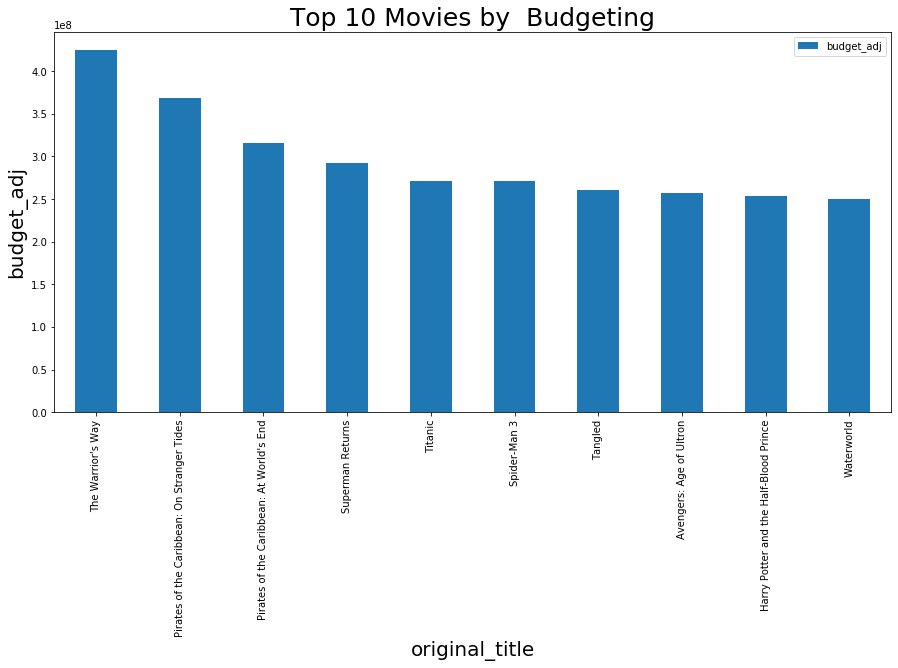

In [439]:
plotting (top_10_budget, 'bar', 'original_title', 'budget_adj', 'Top 10 Movies by  Budgeting')

##### NOTE: From the graph we can figur out that the highest budget of movie was The Warrior's Way.

## Research Question 04 - Top 10 Highest Rating Movies

In [440]:
by_vote = tmdb_clean_columns.sort_values(['release_year','vote_average'], ascending=[True, False])

In [441]:
by_vote.shape

(3854, 15)

In [442]:
top_by_vote  = by_vote.groupby('release_year').head().reset_index(drop=True)

In [443]:
top_by_vote.shape

(279, 15)

In [444]:
top_by_vote.head()

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,2.610362,NaN,2.299854e+08,NaN,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,The master of suspense moves his cameras into ...,109.0,Drama|Horror|Thriller,1960-08-14,8.0,1960,5.949601e+06,2.359350e+08
1,0.947307,NaN,1.622053e+08,NaN,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,"Movie-wise, there has never been anything like...",125.0,Comedy|Drama|Romance,1960-06-15,7.9,1960,2.211890e+07,1.843242e+08
2,0.055821,NaN,3.022917e+07,NaN,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,,91.0,Comedy|Romance,1960-12-18,7.2,1960,2.211890e+07,5.234807e+07
3,1.872132,NaN,2.141847e+07,NaN,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,They were seven - And they fought like seven h...,128.0,Action|Adventure|Western,1960-10-23,7.0,1960,1.474593e+07,3.616441e+07
4,1.136943,NaN,3.539024e+08,NaN,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,More titanic than any story ever told!,197.0,Action|Drama|History,1960-10-06,6.9,1960,8.847561e+07,4.423780e+08


In [445]:
vote_release_year = pd.pivot_table(top_by_vote, index = 'release_year', values = 'vote_average')

In [446]:
vote_release_year.shape

(56, 1)

In [447]:
vote_release_year.head()

,vote_average
release_year,
1960,7.40
1961,7.04
1962,7.16
1963,7.00
1964,7.24


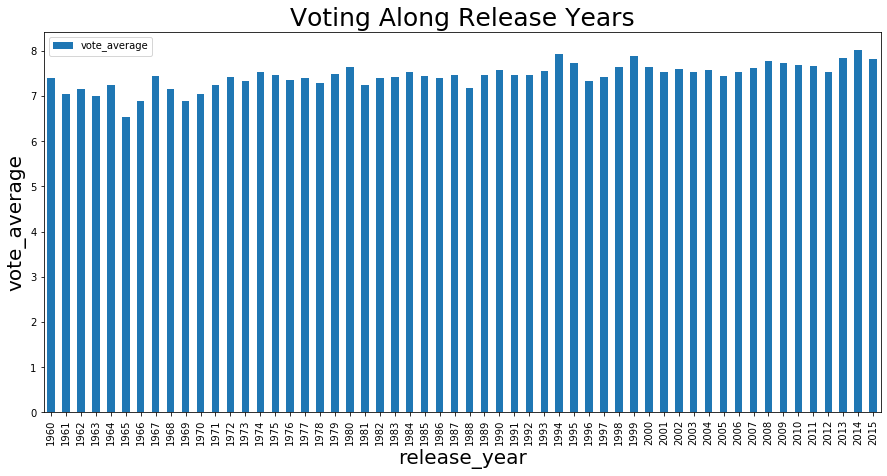

In [448]:
plotting (vote_release_year, 'bar', 'release_year', 'vote_average', 'Voting Along Release Years')

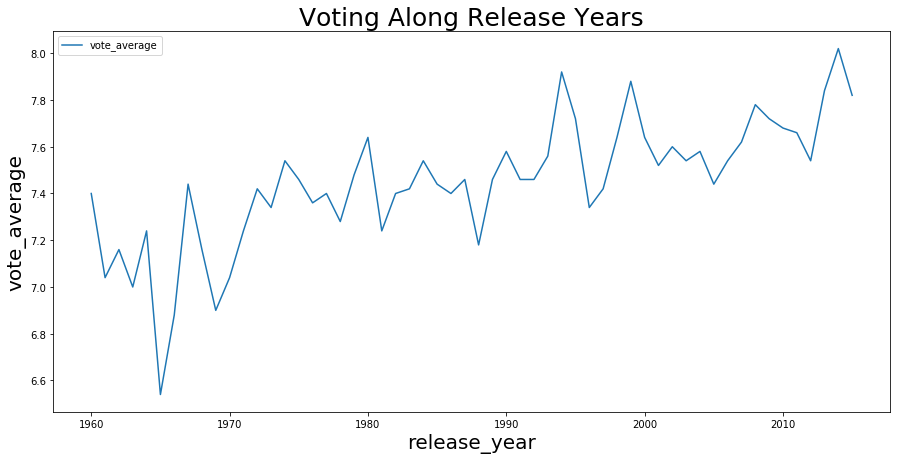

In [449]:
plotting (vote_release_year, 'line', 'release_year', 'vote_average', 'Voting Along Release Years')

##### NOTES: From the graph we can figure out that voting was moderat increasing along release years except the sharp decrease between the year 1964 and the year 1967.

In [450]:
# Top Movies by Rating

top_10_vote = top_by_vote.nlargest(10, 'vote_average')
top_10_vote 

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
119,0.283191,NaN,7.932116e+06,NaN,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,Why stop making sense? Why a movie? Why a big ...,88.0,Documentary|Music,1984-11-16,8.4,1984,2.518850e+06,1.045097e+07
169,7.192039,NaN,4.915674e+06,NaN,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Fear can hold you prisoner. Hope can set you f...,142.0,Drama|Crime,1994-09-10,8.4,1994,3.677779e+07,4.169346e+07
59,5.738034,NaN,1.246626e+09,NaN,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,An offer you can't refuse.,175.0,Drama|Crime,1972-03-15,8.3,1972,3.128737e+07,1.277914e+09
269,4.780419,NaN,9.849312e+06,NaN,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,The road to greatness can take you to the edge.,105.0,Drama|Music,2014-10-10,8.2,2014,3.039600e+06,1.288891e+07
69,3.264571,NaN,1.527582e+08,NaN,The Godfather: Part II,Al Pacino|Robert Duvall|Diane Keaton|Robert De...,Francis Ford Coppola,"I don't feel I have to wipe everybody out, Tom...",200.0,Drama|Crime,1974-12-20,8.1,1974,5.748969e+07,2.102479e+08
164,2.377288,NaN,4.517327e+08,NaN,Schindler's List,Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...,Steven Spielberg,"Whoever saves one life, saves the world entire.",195.0,Drama|History|War,1993-11-29,8.1,1993,3.320834e+07,4.849410e+08
170,6.715966,NaN,9.164222e+08,NaN,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,"The world will never be the same, once you've ...",142.0,Comedy|Drama|Romance,1994-07-06,8.1,1994,8.091114e+07,9.973333e+08
171,8.093754,NaN,3.029442e+08,NaN,Pulp Fiction,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,Quentin Tarantino,Just because you are a character doesn't mean ...,154.0,Thriller|Crime,1994-10-14,8.1,1994,1.176889e+07,3.147131e+08
194,8.947905,NaN,4.955256e+07,NaN,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,How much can you know about yourself if you've...,139.0,Drama,1999-10-14,8.1,1999,8.247033e+07,1.320229e+08
239,8.466668,NaN,8.273675e+08,NaN,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Why So Serious?,152.0,Drama|Action|Crime|Thriller,2008-07-16,8.1,2008,1.873655e+08,1.014733e+09


In [451]:
top_10_vote  = pd.pivot_table(top_10_vote, index = 'original_title', values = 'vote_average')

In [452]:
top_10_vote.shape

(10, 1)

In [453]:
top_10_vote.head()

,vote_average
original_title,
Fight Club,8.1
Forrest Gump,8.1
Pulp Fiction,8.1
Schindler's List,8.1
Stop Making Sense,8.4


In [454]:
top_10_vote = top_10_vote.vote_average.sort_values(ascending = False)

In [455]:
top_10_vote

original_title
The Shawshank Redemption    8.4
Stop Making Sense           8.4
The Godfather               8.3
Whiplash                    8.2
The Godfather: Part II      8.1
The Dark Knight             8.1
Schindler's List            8.1
Pulp Fiction                8.1
Forrest Gump                8.1
Fight Club                  8.1
Name: vote_average, dtype: float64

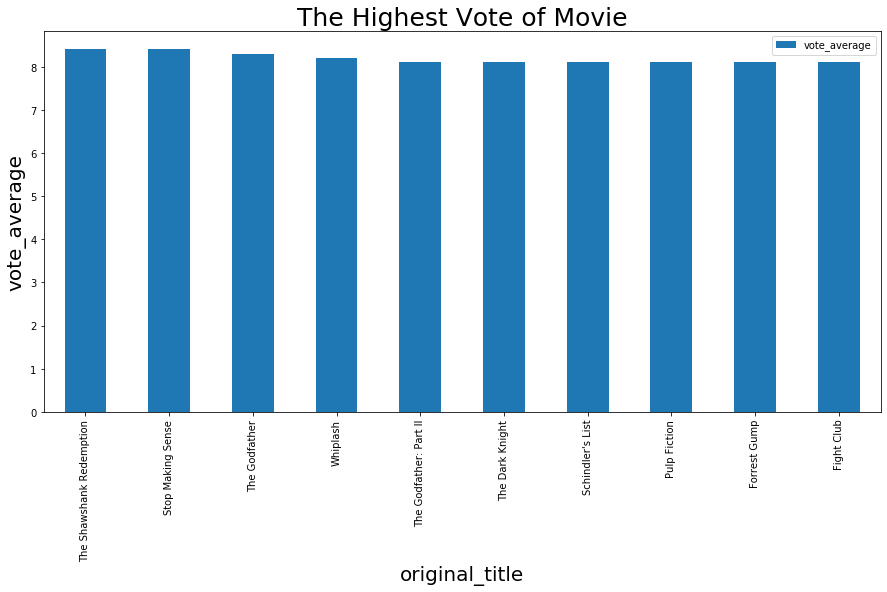

In [456]:
plotting (top_10_vote, 'bar', 'original_title', 'vote_average', 'The Highest Vote of Movie')

##### NOTE: from the graph we can figur out that highest vote of movie was The Shawshank Redemption.

## Research Question 05 - Top 10 Highest Net Profit Movies

In [457]:
by_net_profit = tmdb_clean_columns.sort_values(['release_year','net_profit'], ascending=[True, False])

In [458]:
by_net_profit.shape

(3854, 15)

In [459]:
top_by_net_profit = by_net_profit.groupby('release_year').head().reset_index(drop=True)

In [460]:
top_by_net_profit.shape

(279, 15)

In [461]:
top_by_net_profit.head()

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,1.136943,NaN,3.539024e+08,NaN,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,More titanic than any story ever told!,197.0,Action|Drama|History,1960-10-06,6.9,1960,8.847561e+07,4.423780e+08
1,2.610362,NaN,2.299854e+08,NaN,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,The master of suspense moves his cameras into ...,109.0,Drama|Horror|Thriller,1960-08-14,8.0,1960,5.949601e+06,2.359350e+08
2,0.947307,NaN,1.622053e+08,NaN,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,"Movie-wise, there has never been anything like...",125.0,Comedy|Drama|Romance,1960-06-15,7.9,1960,2.211890e+07,1.843242e+08
3,0.055821,NaN,3.022917e+07,NaN,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,,91.0,Comedy|Romance,1960-12-18,7.2,1960,2.211890e+07,5.234807e+07
4,1.872132,NaN,2.141847e+07,NaN,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,They were seven - And they fought like seven h...,128.0,Action|Adventure|Western,1960-10-23,7.0,1960,1.474593e+07,3.616441e+07


In [462]:
net_profit_release_year = pd.pivot_table(top_by_net_profit, index = 'release_year', values = 'net_profit')

In [463]:
net_profit_release_year.shape

(56, 1)

In [464]:
net_profit_release_year.head()

,net_profit
release_year,
1960,1.595481e+08
1961,4.214726e+08
1962,2.370568e+08
1963,1.743189e+08
1964,4.067895e+08


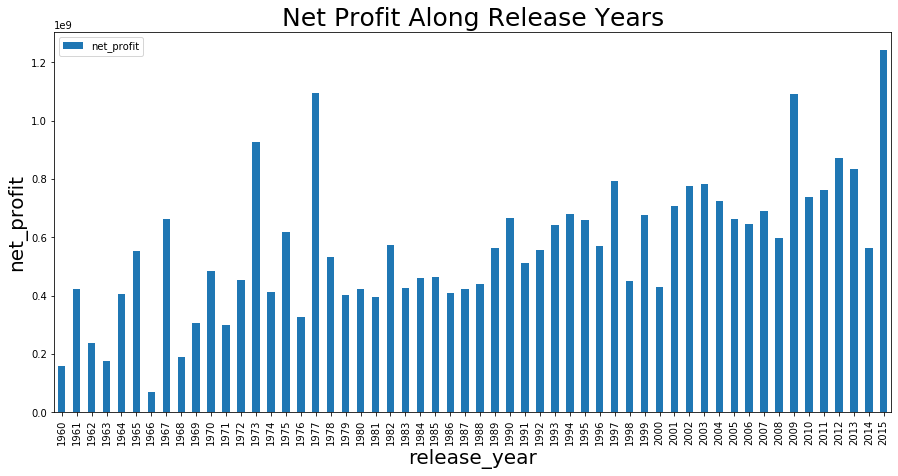

In [465]:
plotting (net_profit_release_year, 'bar', 'release_year', 'net_profit', 'Net Profit Along Release Years')

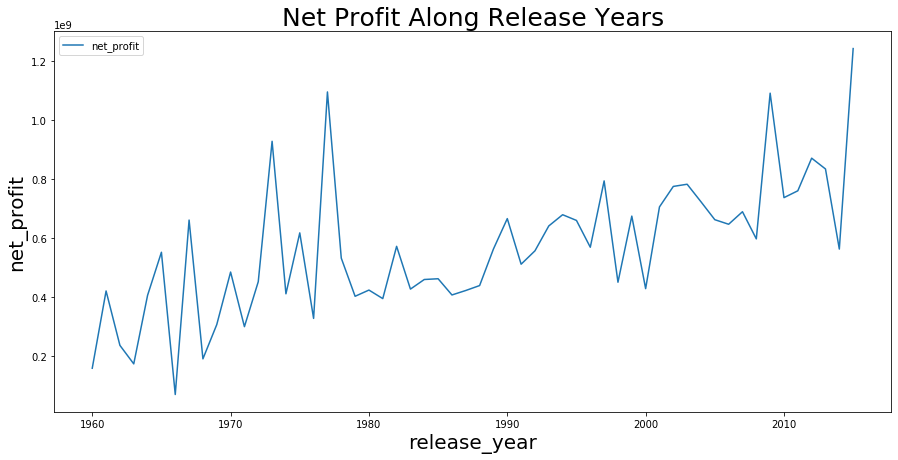

In [466]:
plotting (net_profit_release_year, 'line', 'release_year', 'net_profit', 'Net Profit Along Release Years')

##### NOTE:  From the graph we can figure out that the net profit was increasing along release years and we can notice also there was a sharp increase in some years such as 1973, 1978, 2010 and also the movies after the year 2014. 

In [467]:
# Top Movies by net_profit

top_10_net_profit = top_by_vote.nlargest(10, 'net_profit')
top_10_net_profit 

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
84,12.037933,NaN,2.750137e+09,NaN,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,"A long time ago in a galaxy far, far away...",121.0,Adventure|Action|Science Fiction,1977-03-20,7.9,1977,3.957559e+07,2.789712e+09
186,4.355219,NaN,2.234714e+09,NaN,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,194.0,Drama|Romance|Thriller,1997-11-18,7.3,1997,2.716921e+08,2.506406e+09
67,2.010733,NaN,2.128036e+09,NaN,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Something almost beyond comprehension is happe...,122.0,Drama|Horror|Thriller,1973-12-26,7.2,1973,3.928928e+07,2.167325e+09
76,2.563191,NaN,1.878643e+09,NaN,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,Don't go in the water.,124.0,Horror|Thriller|Adventure,1975-06-18,7.3,1975,2.836275e+07,1.907006e+09
113,2.900556,NaN,1.767968e+09,NaN,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,He is afraid. He is alone. He is three million...,115.0,Science Fiction|Adventure|Family|Fantasy,1982-04-03,7.2,1982,2.372625e+07,1.791694e+09
9,2.631987,NaN,1.545635e+09,NaN,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,The Canine Caper of the Century,79.0,Adventure|Animation|Comedy|Family,1961-01-25,6.6,1961,2.917944e+07,1.574815e+09
99,5.488441,NaN,1.376998e+09,NaN,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Irvin Kershner,The Adventure Continues...,124.0,Adventure|Action|Science Fiction,1980-01-01,8.0,1980,4.762866e+07,1.424626e+09
166,2.204926,NaN,1.293767e+09,NaN,Jurassic Park,Sam Neill|Laura Dern|Jeff Goldblum|Richard Att...,Steven Spielberg,An adventure 65 million years in the making.,127.0,Adventure|Science Fiction,1993-06-11,7.4,1993,9.509661e+07,1.388863e+09
59,5.738034,NaN,1.246626e+09,NaN,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,An offer you can't refuse.,175.0,Drama|Crime,1972-03-15,8.3,1972,3.128737e+07,1.277914e+09
263,7.637767,NaN,1.234248e+09,NaN,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Some assembly required.,143.0,Science Fiction|Action|Adventure,2012-04-25,7.3,2012,2.089437e+08,1.443191e+09


In [468]:
top_10_net_profit  = pd.pivot_table(top_10_net_profit, index = 'original_title', values = 'net_profit')

In [469]:
top_10_net_profit.shape

(10, 1)

In [470]:
top_10_net_profit.head()

,net_profit
original_title,
E.T. the Extra-Terrestrial,1.767968e+09
Jaws,1.878643e+09
Jurassic Park,1.293767e+09
One Hundred and One Dalmatians,1.545635e+09
Star Wars,2.750137e+09


In [471]:
top_10_net_profit = top_10_net_profit.net_profit.sort_values(ascending = False)

In [472]:
top_10_net_profit

original_title
Star Wars                         2.750137e+09
Titanic                           2.234714e+09
The Exorcist                      2.128036e+09
Jaws                              1.878643e+09
E.T. the Extra-Terrestrial        1.767968e+09
One Hundred and One Dalmatians    1.545635e+09
The Empire Strikes Back           1.376998e+09
Jurassic Park                     1.293767e+09
The Godfather                     1.246626e+09
The Avengers                      1.234248e+09
Name: net_profit, dtype: float64

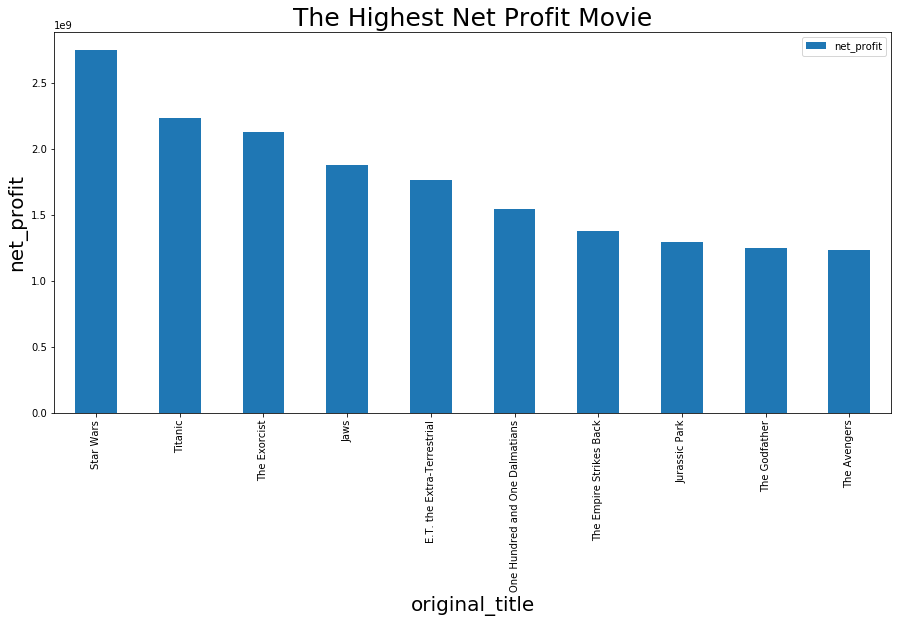

In [473]:
plotting (top_10_net_profit, 'bar', 'original_title', 'net_profit', 'The Highest Net Profit Movie')

##### NOTE: From the graph we can figure out that the highest net profit movie was Star Wars.

In [474]:
by_net_profit.head()

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
3190,1.136943,NaN,3.539024e+08,NaN,Spartacus,Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...,Stanley Kubrick,More titanic than any story ever told!,197.0,Action|Drama|History,1960-10-06,6.9,1960,8.847561e+07,4.423780e+08
4520,2.610362,NaN,2.299854e+08,NaN,Psycho,Anthony Perkins|Vera Miles|John Gavin|Janet Le...,Alfred Hitchcock,The master of suspense moves his cameras into ...,109.0,Drama|Horror|Thriller,1960-08-14,8.0,1960,5.949601e+06,2.359350e+08
5029,0.947307,NaN,1.622053e+08,NaN,The Apartment,Jack Lemmon|Shirley MacLaine|Fred MacMurray|Ra...,Billy Wilder,"Movie-wise, there has never been anything like...",125.0,Comedy|Drama|Romance,1960-06-15,7.9,1960,2.211890e+07,1.843242e+08
7363,0.055821,NaN,3.022917e+07,NaN,Cinderfella,Jerry Lewis|Ed Wynn|Judith Anderson|Henry Silv...,Frank Tashlin,,91.0,Comedy|Romance,1960-12-18,7.2,1960,2.211890e+07,5.234807e+07
7679,1.872132,NaN,2.141847e+07,NaN,The Magnificent Seven,Yul Brynner|Eli Wallach|Steve McQueen|Charles ...,John Sturges,They were seven - And they fought like seven h...,128.0,Action|Adventure|Western,1960-10-23,7.0,1960,1.474593e+07,3.616441e+07


In [475]:
by_net_profit.shape

(3854, 15)

In [476]:
by_net_profit.describe()

,popularity,budget,net_profit,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,22.000000,3.854000e+03,31.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,30.090909,9.282470e+07,51.516129,109.220291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,36.818615,1.940715e+08,67.591356,19.922820,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000,-4.139124e+08,2.000000,15.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,6.500000,-1.504995e+06,11.000000,95.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,13.000000,2.737064e+07,16.000000,106.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,28.750000,1.074548e+08,62.000000,119.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,114.000000,2.750137e+09,250.000000,338.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [477]:
top_10_genres = by_net_profit.nlargest(10, 'net_profit')


In [478]:
top_10_genres.head()

,popularity,budget,net_profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
201,12.037933,NaN,2.750137e+09,NaN,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,"A long time ago in a galaxy far, far away...",121.0,Adventure|Action|Science Fiction,1977-03-20,7.9,1977,3.957559e+07,2.789712e+09
20,9.432768,NaN,2.586237e+09,NaN,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,162.0,Action|Adventure|Fantasy|Science Fiction,2009-12-10,7.1,2009,2.408869e+08,2.827124e+09
59,4.355219,NaN,2.234714e+09,NaN,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,194.0,Drama|Romance|Thriller,1997-11-18,7.3,1997,2.716921e+08,2.506406e+09
410,2.010733,NaN,2.128036e+09,NaN,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,Something almost beyond comprehension is happe...,122.0,Drama|Horror|Thriller,1973-12-26,7.2,1973,3.928928e+07,2.167325e+09
385,2.563191,NaN,1.878643e+09,NaN,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,Don't go in the water.,124.0,Horror|Thriller|Adventure,1975-06-18,7.3,1975,2.836275e+07,1.907006e+09


In [479]:
Geners_Net_Profit = pd.pivot_table(top_10_genres, index = 'genres', values = 'net_profit')

In [480]:
Geners_Net_Profit 

,net_profit
genres,
Action|Adventure|Fantasy|Science Fiction,2.586237e+09
Action|Adventure|Science Fiction|Fantasy,1.718723e+09
Adventure|Action|Science Fiction,2.063567e+09
Adventure|Animation|Comedy|Family,1.545635e+09
Crime|Drama|Mystery|Thriller|Action,1.551568e+09
Drama|Horror|Thriller,2.128036e+09
Drama|Romance|Thriller,2.234714e+09
Horror|Thriller|Adventure,1.878643e+09
Science Fiction|Adventure|Family|Fantasy,1.767968e+09


In [481]:
Geners_Net_Profit = Geners_Net_Profit.net_profit.sort_values(ascending = False)

In [482]:
Geners_Net_Profit 

genres
Action|Adventure|Fantasy|Science Fiction    2.586237e+09
Drama|Romance|Thriller                      2.234714e+09
Drama|Horror|Thriller                       2.128036e+09
Adventure|Action|Science Fiction            2.063567e+09
Horror|Thriller|Adventure                   1.878643e+09
Science Fiction|Adventure|Family|Fantasy    1.767968e+09
Action|Adventure|Science Fiction|Fantasy    1.718723e+09
Crime|Drama|Mystery|Thriller|Action         1.551568e+09
Adventure|Animation|Comedy|Family           1.545635e+09
Name: net_profit, dtype: float64

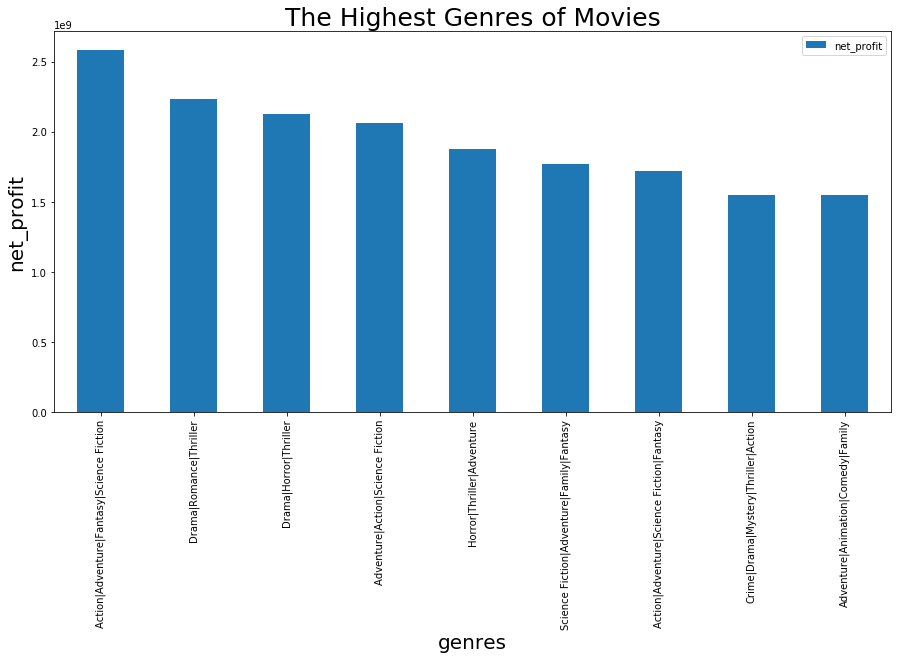

In [483]:
plotting(Geners_Net_Profit, 'bar', 'genres','net_profit' , 'The Highest Genres of Movies')

##### NOTE: From the graph we can figure out the highest genres of movies were Action, Adventure, Fantasy and Science Fiction.

In [484]:
explorations  = pd.pivot_table(by_net_profit, index = 'release_year', values = ['net_profit', 'runtime', 'budget_adj', 'revenue_adj', 'vote_average', 'popularity', 'genres', 'cast'])

In [485]:
explorations.describe()

,budget_adj,net_profit,popularity,revenue_adj,runtime,vote_average
count,5.600000e+01,5.600000e+01,56.000000,5.600000e+01,56.000000,56.000000
mean,3.991923e+07,1.456689e+08,1.059704,1.855881e+08,114.847356,6.391060
std,1.312820e+07,1.032232e+08,0.377869,1.026257e+08,12.203451,0.339090
min,1.542484e+07,5.585189e+07,0.395168,9.509591e+07,103.304348,5.971698
25%,3.048337e+07,8.051874e+07,0.889946,1.265249e+08,107.932782,6.104961
50%,4.117684e+07,1.026524e+08,0.999123,1.453704e+08,109.718896,6.271167
75%,4.698083e+07,1.635509e+08,1.159475,2.102314e+08,118.346154,6.658974
max,8.138583e+07,5.526511e+08,2.856943,6.340369e+08,167.600000,7.400000


In [486]:
explorations.shape

(56, 6)

In [487]:
# Explorations array was created to explore some associations
explorations.head()

,budget_adj,net_profit,popularity,revenue_adj,runtime,vote_average
release_year,,,,,,
1960,3.068179e+07,1.595481e+08,1.324513,1.902299e+08,130.000000,7.400000
1961,2.818516e+07,2.181770e+08,0.787718,2.463622e+08,132.500000,6.620000
1962,4.062476e+07,1.718493e+08,0.983485,2.124740e+08,141.285714,6.900000
1963,7.252496e+07,1.369589e+08,1.040612,2.094838e+08,153.500000,6.766667
1964,3.408189e+07,2.959526e+08,1.377790,3.300344e+08,122.428571,6.971429


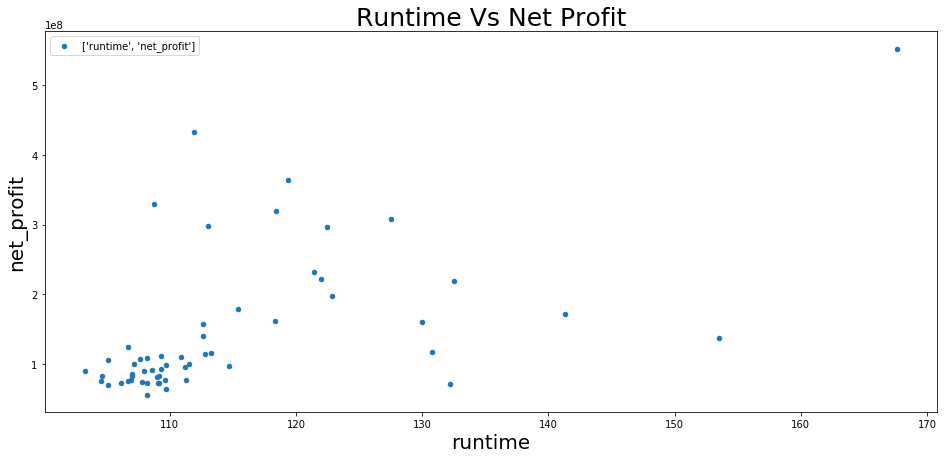

In [488]:
# Top explore the corelation between the Runtime and the Net Profit

plotting2d (explorations, 'scatter', 'runtime', 'net_profit', 'Runtime Vs Net Profit')

##### NOTE:  From graph we can figure out that there is a moderate positive changing correlation between runtime and net profit, and there are some outlier values.

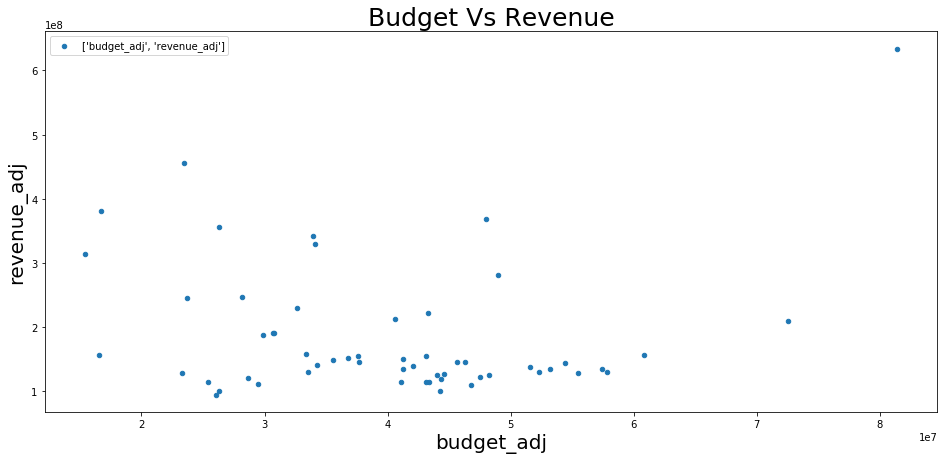

In [489]:
# Top explore the corelation between the Budget and the Revenue

plotting2d (explorations, 'scatter', 'budget_adj', 'revenue_adj', 'Budget Vs Revenue')

##### NOTE: From the graph we can figure out that there is a week negative changing correlation between budget and revenue and there are some outlier values.

<a id='conclusions'></a>
# Conclusions


> **From this investigation we can summarize the findings as follow:**
>
> - There is a moderate postive non-liner correlation, and there is anout lier valye.
>
> - there is a moderate positive changing correlation between runtime and net profit, and there are some outlier values.
>
> - there is a week negative changing correlation between budget and revenue and there are some outlier values.



> **The creteria of the successful movies and could genrate average revenue about 137 million dollar as follow:**
>1. The average runtime is 151 minutes
>2. The average budget is 44 million dollar.
>3. The genrs should be adventure, action and science fiction.


>**Limitations**
>
>This report was done depending on the provided dataset which which has a missing information, also we don't know the information acuracy  included in this dataset or if it is up to date or no.  So, droping the rows with missing information may have affetted the analysis results in this report. On the other hand the remaining complete information if we asum they are acurate we can consider the analysis result positively whic can we depend on. 


##### Answer_Q1:
> The highest runtimes movies were from the year 2008 to 2010.
>
> The top 10 highest runtimes movies startimg from the minimum runtimes are:  [ The Greatest Story Ever Told, The Godfather: Part II, The Lord of the Rings: The Return of the King, Malcolm X, Jodhaa Akbar, Gods and Generals, Lawrence of Arabia, Heaven's Gate, Cleopatra and Carlos. ]
>
>
##### Answer_Q2:
>The highest revenues movies were from the year 2009 to 2015.
>
>The top 10 highest  revenue movies startimg from the minimum revenues are:  [ The Avengers ,  One Hundred and One Dalmatians, The Net, E.T. the Extra-Terrestrial, Star Wars: The Force Awakens, Jaws, The Exorcist, Titanic, Star Wars, Avatar. ]   
>
>
##### Answer_Q3:
>The highest budgets movies were from the year 2006 to 2013.
>
>The top 10 highest  budget movies startimg from the minimum budgets are:  [ Waterworld, Harry Potter and the Half-Blood Prince, Avengers: Age of Ultron, Tangled, Spider-Man 3, Titanic, Superman, Returns, Pirates of the Caribbean: At World's End, Pirates of the Caribbean: On Stranger Tides, The Warrior's Way. ] 
>
>
##### Answer_Q4:
>The highest rating movies were from the year 2013 to 2015.
>
>The top 10 highest  rating movies startimg from the minimum rating are:  [ original_title, Fight Club, Forrest Gump, Pulp Fiction, Schindler's List, The Dark Knight,  Godfather: Part II, Whiplash, The Godfather, Stop Making Sense and the The Shawshank Redemption. ]                   
>
>
##### Answer_Q5:
>The highest net profit movies were at the year 1973, 1977 and from the year 2009 to 2015 except the year 2014.
>
>The top 10 highest  net profit movies startimg from the minimum net profit are:  [ The Avengers, The Godfather, Jurassic Park, The Empire Strikes Back, One Hundred and One Dalmatians, E.T. the Extra-Terrestrial, Jaws, The Exorcist, Titanic and the Star Wars. ]    
>
>

#### End of the investigation. 